In [ ]:
!pip install keras

In [ ]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

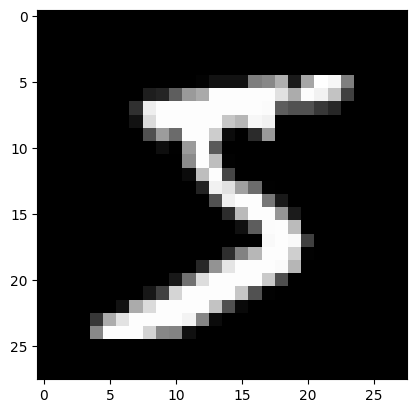

In [ ]:
plt.imshow(X_train[0],cmap= 'gray')

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train[0]

5

#Processing The Data


In [ ]:
image_height,image_width = 28,28

In [ ]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(X_train[0])
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
y_train = to_categorical(y_train,10)
print(y_train.shape)
y_test = to_categorical(y_test,10)
print(y_test.shape)

(60000, 10)
(10000, 10)


#Buliding the model


In [ ]:
model = Sequential()
model.add(Dense(512,activation = 'relu', input_shape=(784,)))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))

In [ ]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
784*512+512

401920

In [ ]:
512*512+512

262656

In [ ]:
512*10+10

5130

#Training a Model

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1836 - accuracy: 0.9439 - val_loss: 0.1042 - val_accuracy: 0.9681
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0795 - accuracy: 0.9750 - val_loss: 0.0817 - val_accuracy: 0.9759
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0686 - val_accuracy: 0.9779
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.0922 - val_accuracy: 0.9750
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0788 - val_accuracy: 0.9799
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0769 - val_accuracy: 0.9815
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0954 - val_accura

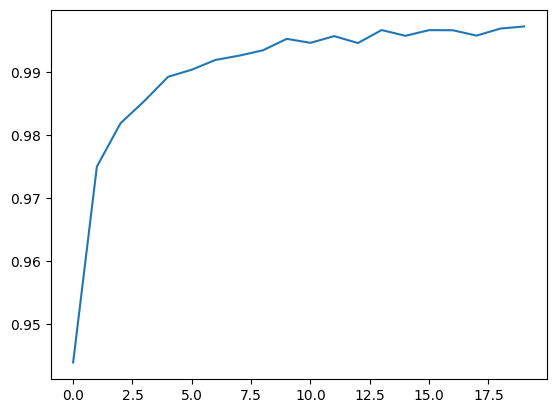

In [ ]:
plt.plot(history.history['accuracy'])

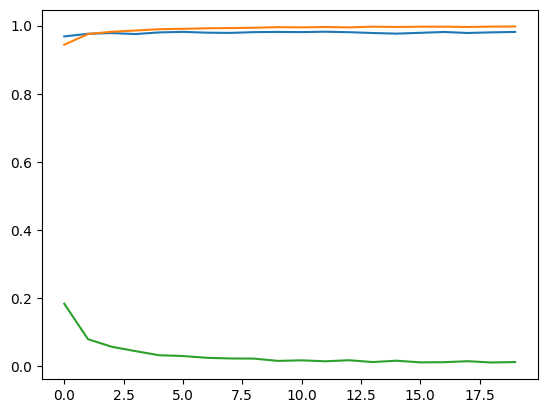

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

In [ ]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1292 - accuracy: 0.9813


In [ ]:
score

[0.1292038857936859, 0.9812999963760376]

In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train),(X_test,y_test )=  mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
num_classes = 10
epochs = 3


X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_test /= 255.0
X_train /= 255.0
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size = (5,5), input_shape=(28,28,1), padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size = (5,5),padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024, activation = 'relu'))
cnn.add(Dense(10,activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [ ]:
history_cnn = cnn.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0989 - accuracy: 0.9681 - val_loss: 0.0508 - val_accuracy: 0.9836
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0458 - val_accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0383 - val_accuracy: 0.9894


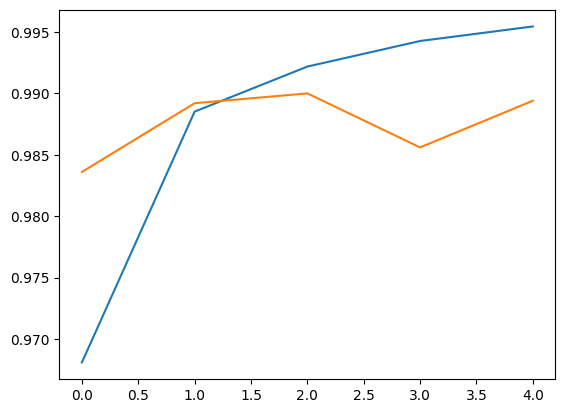

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [ ]:
score = cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9894


In [ ]:
score

[0.038252271711826324, 0.9894000291824341]